In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv',encoding='Windows-1252')

In [4]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
846,ham,My stomach has been thru so much trauma I swea...,NaN,NaN,NaN
4667,ham,IM REALY SOZ IMAT MY MUMS 2NITE WHAT ABOUT 2MORO,NaN,NaN,NaN
5404,ham,Pls give her prometazine syrup. 5mls then &lt...,NaN,NaN,NaN
327,ham,"I'd say that's a good sign but, well, you know...",NaN,NaN,NaN
279,ham,All done? All handed in? Celebrations in full ...,NaN,NaN,NaN
1979,ham,Shhhhh nobody is supposed to know!,NaN,NaN,NaN
2093,spam,Final Chance! Claim ur å£150 worth of discount...,NaN,NaN,NaN
5539,ham,Just sleeping..and surfing,NaN,NaN,NaN
1852,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
602,ham,Speaking of does he have any cash yet?,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

##1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
5407,ham,Yup he msg me: is tat yijue? Then i tot it's m...
3566,spam,Collect your VALENTINE'S weekend to PARIS inc ...
4268,ham,Beauty sleep can help ur pimples too.
4914,ham,We took hooch for a walk toaday and i fell ove...
3238,ham,Am okay. Will soon be over. All the best


In [9]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5445,ham,"And that's fine, I got enough bud to last most..."
4134,ham,No need to say anything to me. I know i am an ...
718,spam,You have WON a guaranteed å£1000 cash or a å£2...
2136,ham,Well done and ! luv ya all
2057,ham,"Nothing, i got msg frm tht unknown no.."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate values
int(df.duplicated().sum())

403

In [15]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [16]:
int(df.duplicated().sum())

0

In [17]:
df.shape

(5169, 2)

#2.EDA (Exploratory Data Analysis)

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

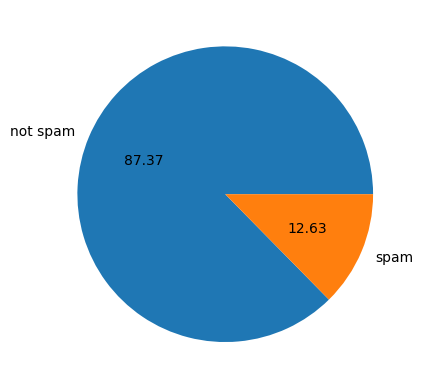

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['not spam','spam'],autopct="%0.2f")
plt.show()

In [21]:
#Data is imbalanced

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
!pip uninstall -y nltk
!pip install --upgrade nltk


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
import nltk
print(nltk.data.find('tokenizers/punkt'))


C:\Users\HP\AppData\Roaming\nltk_data\tokenizers\punkt


In [26]:
nltk.download('punkt_tab')   

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
df['num_characters']=df['text'].apply(len)

In [28]:
from nltk.tokenize import word_tokenize

df['num-words']=df['text'].apply(lambda x: len(word_tokenize(x)))


In [29]:
df.head()

,target,text,num_characters,num-words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df.rename(columns={'num-words':'num_words'},inplace=True)

In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
from nltk.tokenize import sent_tokenize
df['num_sentences']=df['text'].apply(lambda x: len(sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#not_spam
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

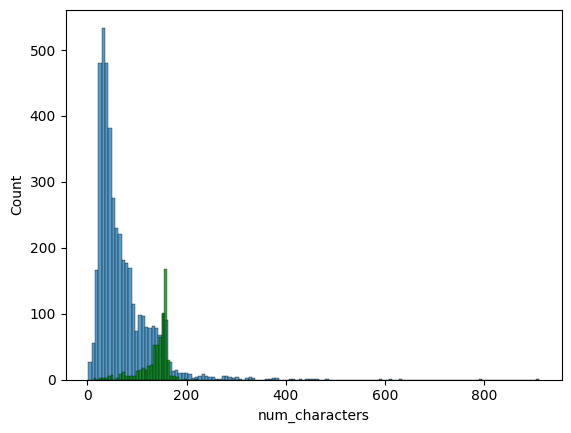

In [38]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

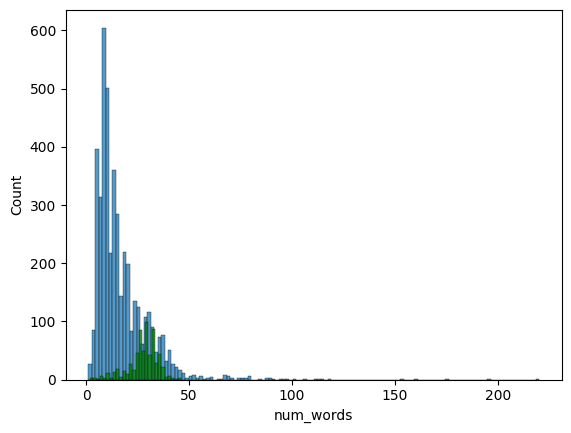

In [39]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='green')

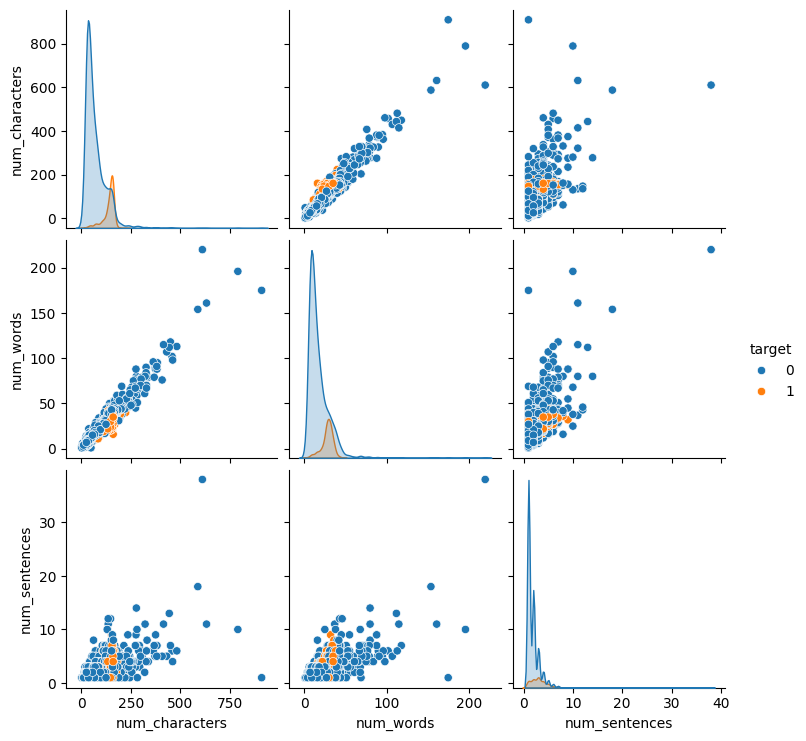

In [40]:
sns.pairplot(df,hue='target')

<Axes: >

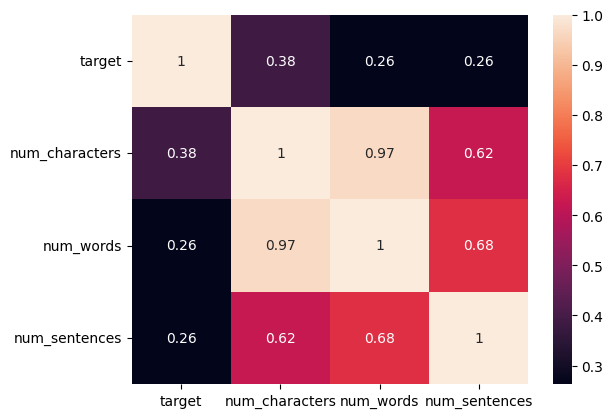

In [41]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(),annot=True)

In [42]:
#3.Data Preprocessing
#lowercase
#tokenization
#removing special characters
#removing stop words and punctuation
#stemming

In [43]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [47]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [48]:
transform_text('i used to like chocolate?%')

'use like chocol'

In [49]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [50]:
df['transformed_text']=df['text'].apply(transform_text)

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
!pip install wordcloud



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
from wordcloud import WordCloud
wc=WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [54]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

In [55]:
spam_corpus = []
for msg in df[df['target'] == 1]['text'].tolist():
    spam_corpus.extend(msg.lower().split())

# Now generate from full corpus
spam_wc = WordCloud(width=600, height=400, min_font_size=10, background_color='white').generate(" ".join(spam_corpus))

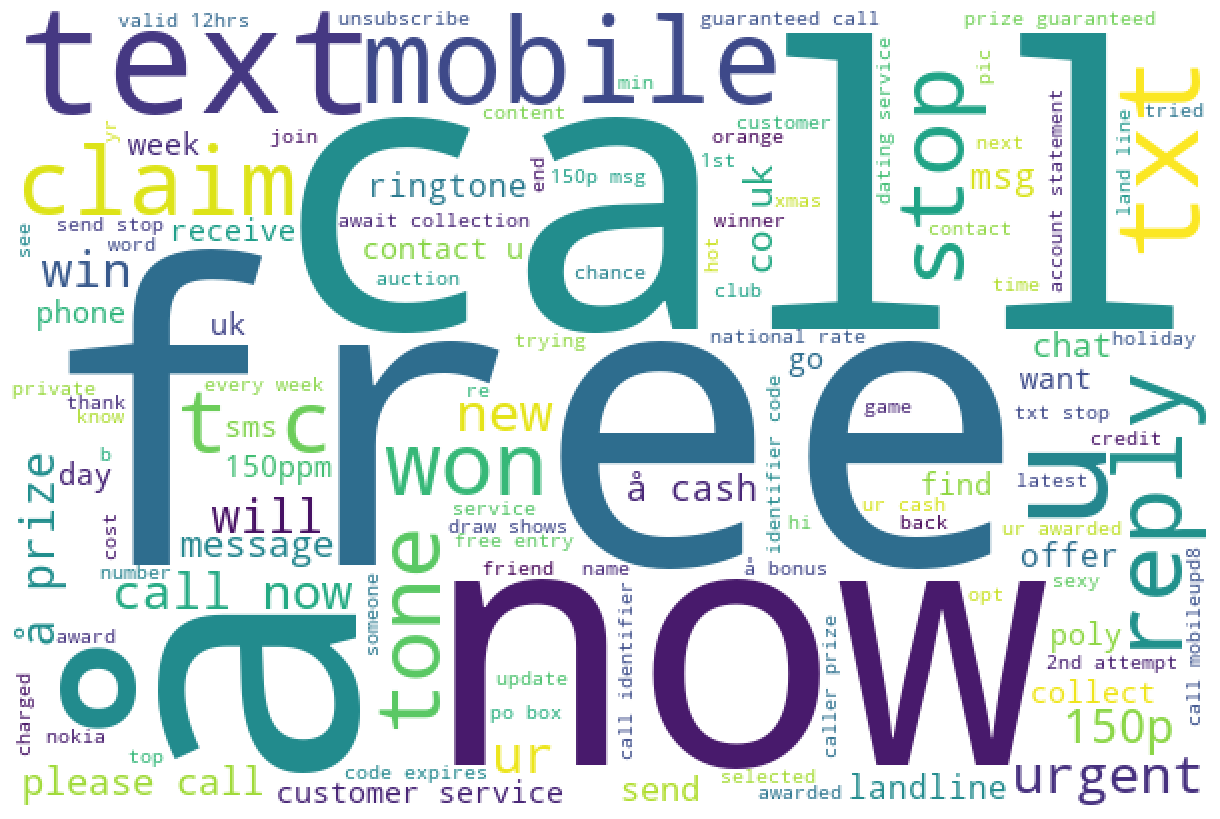

In [56]:
plt.figure(figsize=(12, 8))  # Larger image
plt.imshow(spam_wc)          # Show image
plt.axis('off')              # Hide axes
plt.tight_layout(pad=0)
plt.show()

In [57]:
nonspam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

In [58]:
nonspam_corpus = []
for msg in df[df['target'] == 0]['text'].tolist():
    nonspam_corpus.extend(msg.lower().split())

# Now generate from full corpus
nonspam_wc = WordCloud(width=600, height=400, min_font_size=10, background_color='white').generate(" ".join(nonspam_corpus))

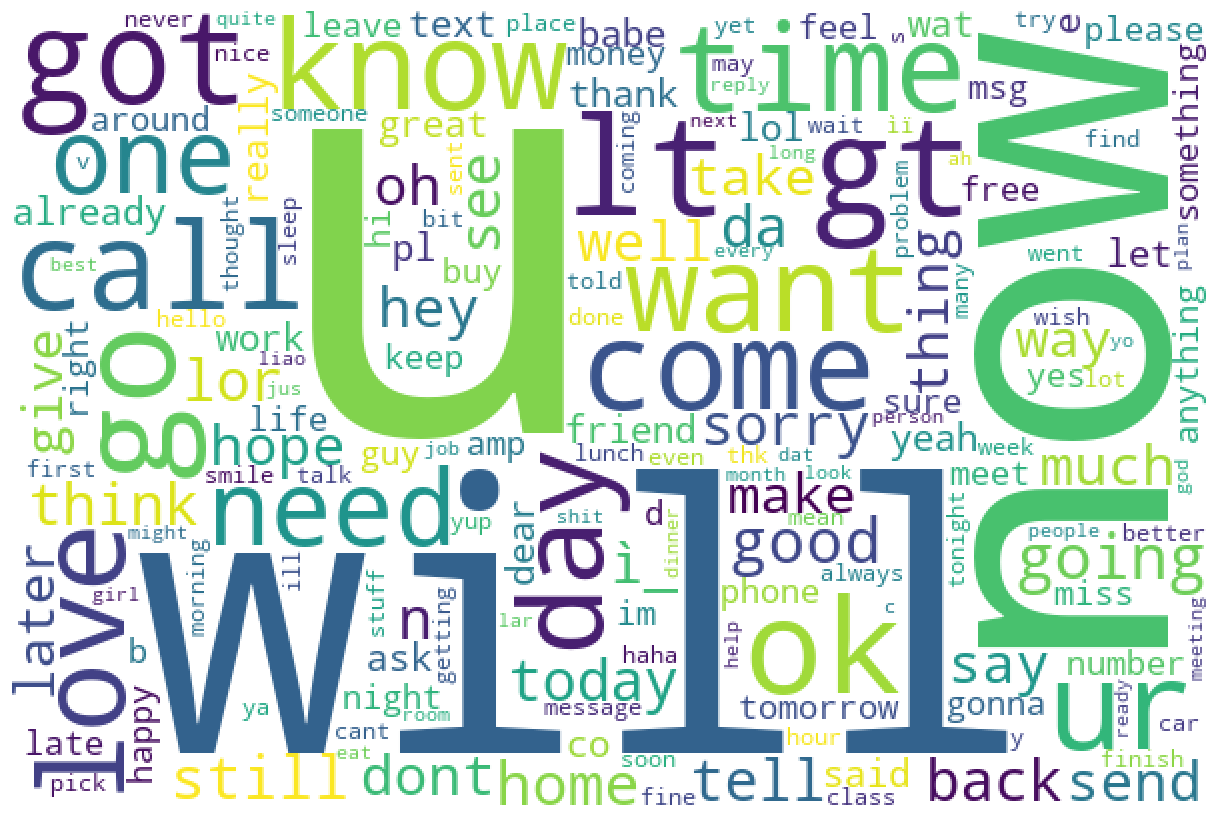

In [59]:
plt.figure(figsize=(12, 8))  # Larger image
plt.imshow(nonspam_wc)          # Show image
plt.axis('off')              # Hide axes
plt.tight_layout(pad=0)
plt.show()

In [60]:
nonspam_corpus

['go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'cine',
 'there',
 'got',
 'amore',
 'wat...',
 'ok',
 'lar...',
 'joking',
 'wif',
 'u',
 'oni...',
 'u',
 'dun',
 'say',
 'so',
 'early',
 'hor...',
 'u',
 'c',
 'already',
 'then',
 'say...',
 'nah',
 'i',
 "don't",
 'think',
 'he',
 'goes',
 'to',
 'usf,',
 'he',
 'lives',
 'around',
 'here',
 'though',
 'even',
 'my',
 'brother',
 'is',
 'not',
 'like',
 'to',
 'speak',
 'with',
 'me.',
 'they',
 'treat',
 'me',
 'like',
 'aids',
 'patent.',
 'as',
 'per',
 'your',
 'request',
 "'melle",
 'melle',
 '(oru',
 'minnaminunginte',
 'nurungu',
 "vettam)'",
 'has',
 'been',
 'set',
 'as',
 'your',
 'callertune',
 'for',
 'all',
 'callers.',
 'press',
 '*9',
 'to',
 'copy',
 'your',
 'friends',
 'callertune',
 "i'm",
 'gonna',
 'be',
 'home',
 'soon',
 'and',
 'i',
 "don't",
 'want',
 'to',
 'talk',
 'about',
 'this',
 'stuff',
 'anymore',
 'toni

In [61]:
spam_corpus

['free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005.',
 'text',
 'fa',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question(std',
 'txt',
 "rate)t&c's",
 'apply',
 "08452810075over18's",
 'freemsg',
 'hey',
 'there',
 'darling',
 "it's",
 'been',
 '3',
 "week's",
 'now',
 'and',
 'no',
 'word',
 'back!',
 "i'd",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still?',
 'tb',
 'ok!',
 'xxx',
 'std',
 'chgs',
 'to',
 'send,',
 'å£1.50',
 'to',
 'rcv',
 'winner!!',
 'as',
 'a',
 'valued',
 'network',
 'customer',
 'you',
 'have',
 'been',
 'selected',
 'to',
 'receivea',
 'å£900',
 'prize',
 'reward!',
 'to',
 'claim',
 'call',
 '09061701461.',
 'claim',
 'code',
 'kl341.',
 'valid',
 '12',
 'hours',
 'only.',
 'had',
 'your',
 'mobile',
 '11',
 'months',
 'or',
 'more?',
 'u',
 'r',
 'entitled',
 'to',
 'update',
 'to',
 'the',
 'latest',
 'colour',
 'mobiles',
 'with',
 'camera',
 'for',
 'free!',

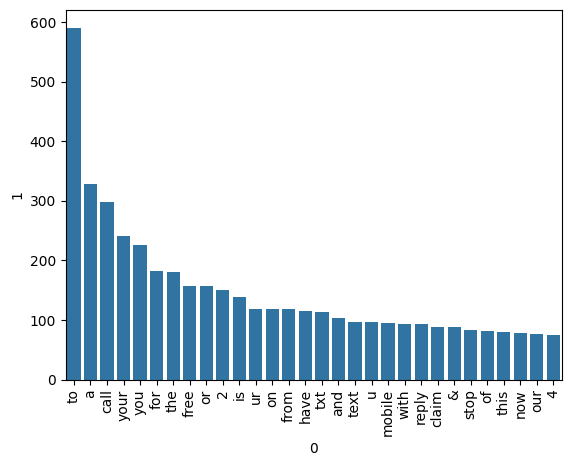

In [62]:
from collections import Counter
df1 = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=df1[0], y=df1[1])

plt.xticks(rotation='vertical')
plt.show()

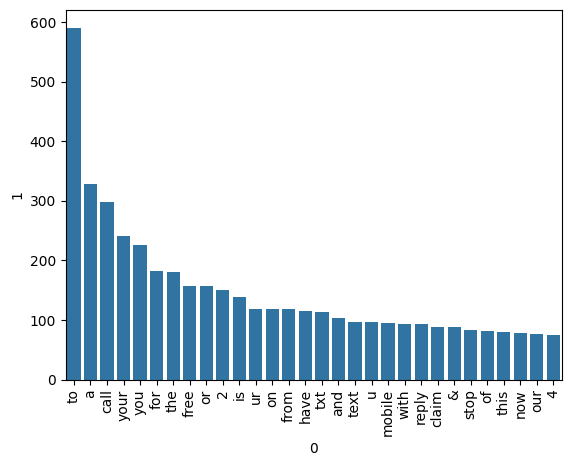

In [63]:
df2 = pd.DataFrame(Counter(nonspam_corpus).most_common(30))
from collections import Counter
sns.barplot(x=df1[0], y=df1[1])

plt.xticks(rotation='vertical')
plt.show()

#4.Model Building

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [65]:

tfidf = TfidfVectorizer()

In [66]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [67]:
X.shape

(5169, 6708)

In [68]:
y=df['target'].values

In [69]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [72]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [73]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [74]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
      

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [75]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
      

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [76]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
      

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [77]:
#tfidf--> Mnb

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [79]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [80]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [81]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [82]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [83]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239


In [84]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [85]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
6,AdaBoost,0.924565,0.840909
3,DT,0.935203,0.838095


In [86]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [87]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,LR,Accuracy,0.951644
6,GBDT,Accuracy,0.952611
7,BgC,Accuracy,0.958414
8,AdaBoost,Accuracy,0.924565
9,DT,Accuracy,0.935203


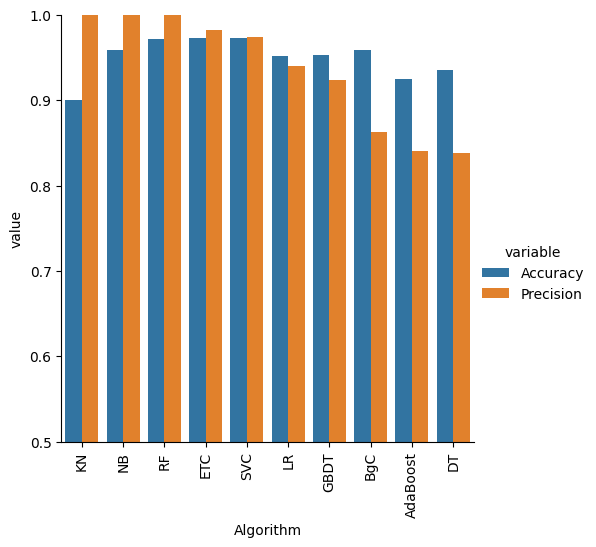

In [88]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [89]:
#model improve
#1.change the max_features parameter of TfIdf

In [90]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [92]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [93]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [95]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
2,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
3,ETC,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
4,SVC,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
5,LR,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000
6,GBDT,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810
7,BgC,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595
8,AdaBoost,0.924565,0.840909,0.924565,0.840909,0.924565,0.840909,0.924565,0.840909
9,DT,0.935203,0.838095,0.935203,0.838095,0.935203,0.838095,0.935203,0.838095


In [96]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [97]:
voting.fit(X_train,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [98]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 1.0


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train) 
pickle.dump(mnb, open('model.pkl', 'wb'))



In [ ]:
import pickle

# Assuming your model is mnb and vectorizer is tfidf
with open('model.pkl', 'wb') as f:
    pickle.dump(mnb, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)


In [ ]:
df['target'].unique()